In [195]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [196]:
#SOM class, random initialize weight and size of array. Shape of 3
class SOM_NN:
    def __init__(self,x,y):
        self.layer = np.random.randint(0,255,size=(x,y,3))

#function to train the SOM network
# x,y = size of SOM, training = training dataset, s_0 is initial learning rate
def Train_SOM_NN(x,y,training,s_0):

    #initialize SOM
    SOM = SOM_NN(x,y)
    SOM.layer = SOM.layer/255 #normalize NN weights
    #normalize training data
    np.asarray(training)
    training = np.array(training)
    training = training/255 

    #initialize plot
    subplot = 0 
    fig = plt.figure(figsize=(5, 5))
   
    #training loop
    for epoch in range (0,1001,1):
        
        #pick a random color from training set
        random = np.random.randint(0,23)
        color = training[random]

        #reset minimum distance and winning neurons location
        d_min = 999
        x_min = 0
        y_min = 0

        #finding winning neuron
        #loop through each neurons
        for i in range(0,len(SOM.layer)):
            for j in range(0,len(SOM.layer[i])):
                #find the eucluedian distance between the weights and selected color
                d_current = np.linalg.norm(SOM.layer[i,j] - color)
                #if the current distance is smaller then minimum distance update min distance
                if d_current < d_min:
                    d_min = d_current
                    x_min = i
                    y_min = j

        #update the weights base on winning neurons and initial learning rate
        #loop through each neurons
        for i in range(0,len(SOM.layer)):
            for j in range(0,len(SOM.layer[i])):
                #calculate distance between winning neuron and it neighbour
                d_neighbour = math.sqrt((i-x_min)**2 + (j-y_min)**2)
                #calculate learning rate decay base on s_0 and current epoch
                sigma = s_0*math.exp(-epoch/1000)
                #calculate the neighbourhood function
                N_k = math.exp(-d_neighbour**2/(2*(sigma**2)))
                #update weight of current neuron
                SOM.layer[i,j] = SOM.layer[i,j] + N_k*(color - SOM.layer[i,j])
        
        #print SOM after number of epochs
        if epoch in {20,40,100,1000}:

            subplot = subplot + 1
            fig.add_subplot(2,2,subplot)
            plt.imshow(SOM.layer)
            plt.axis('off')
            plt.title('epoch:' + str(epoch))

    

In [197]:
#declare training data
training = [[255,0,0], #red
            [255,65,65], #shade of red
            [255,125,125], #shade of red
            [255,190,190], #shade of red

            [255,255,0], #yellow
            [255,255,65], #shade of yellow
            [255,255,125], #shade of yellow
            [255,255,190], #shade of yellow

            [0,255,0], #green
            [65,255,65], #shade of green
            [125,255,125], #shade of green
            [190,255,190], #shade of green

            [0,255,255], #teal
            [65,255,255], #shade of teal
            [125,255,255], #shade of teal
            [190,255,255], #shade of teal

            [0,0,255], #blue
            [65,65,255], #shade of blue
            [125,125,255],  #shade of blue
            [190,190,255],  #shade of blue

            [255,0,255],  #pink
            [255,65,255], #shade of pink
            [255,125,255], #shade of pink
            [255,190,255], #shade of pink
            
            ] 

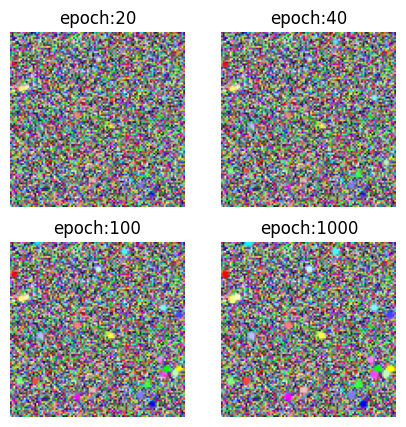

In [198]:
#run training for s_0 = 1
Train_SOM_NN(100,100,training,1)

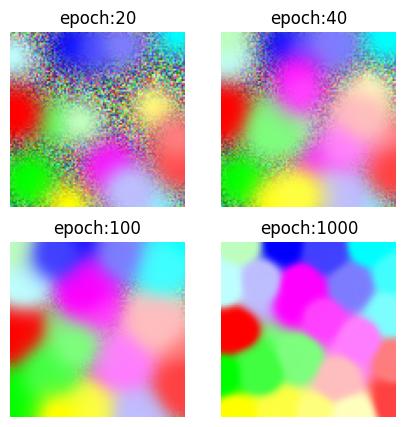

In [199]:
#run training for s_0 = 10
Train_SOM_NN(100,100,training,10)

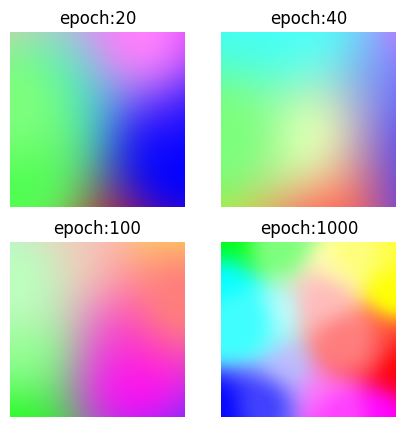

In [200]:
#run training for s_0 = 30
Train_SOM_NN(100,100,training,30)

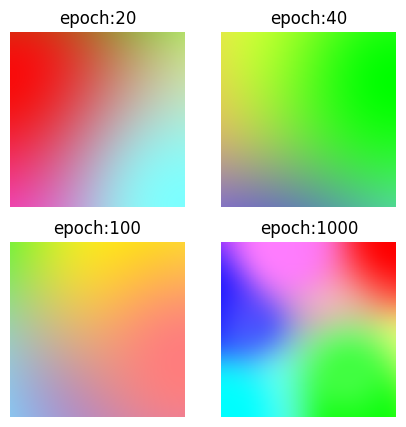

In [201]:
#run training for s_0 = 50
Train_SOM_NN(100,100,training,50)

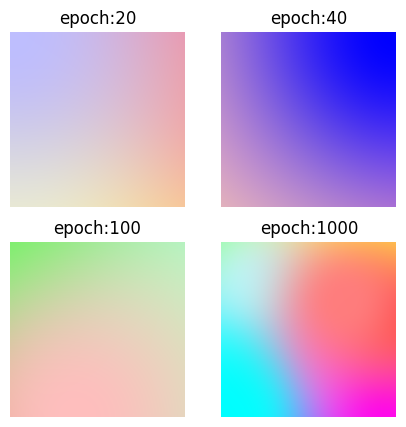

In [202]:
#run training for s_0 = 70
Train_SOM_NN(100,100,training,70)